# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are 4 functions you need to complete to have a working project. These functions are described using the RE formula, which stands for Requires and Effects. Each function will have its own RE located directly above the function definition. The Requires section describes what is needed in the function argument (inbetween the function definition parenthesis). The Effects portion outlines what the function is supposed to do. 
5. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

'Results found in file a-0.png'

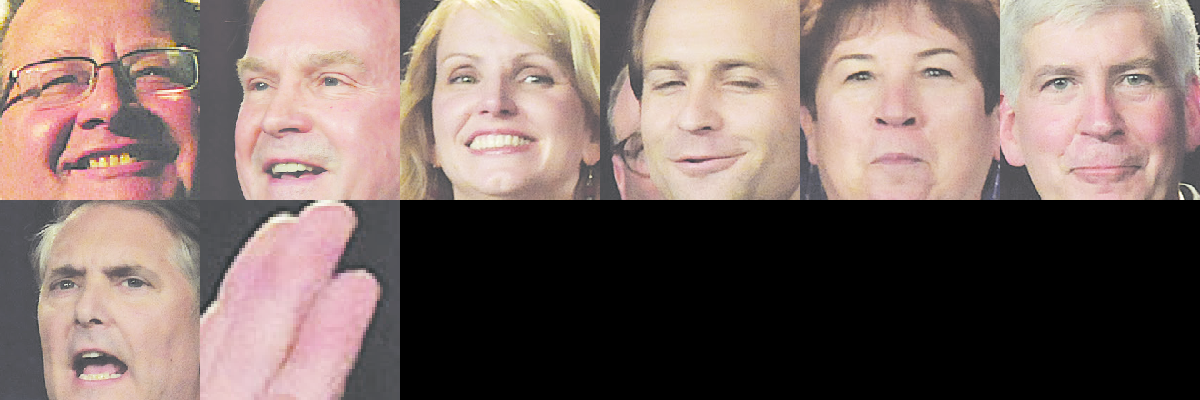

None

'Results found in file a-1.png'

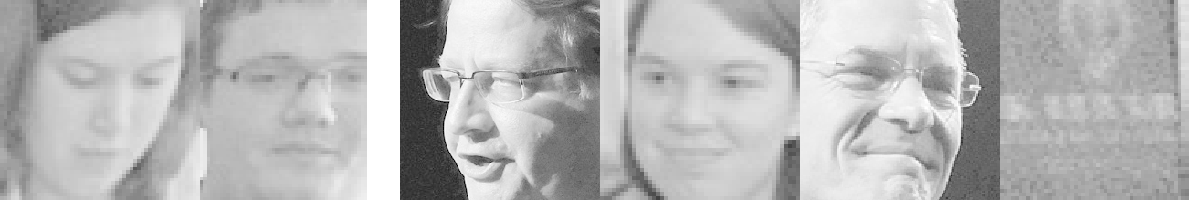

None

'Results found in file a-10.png'

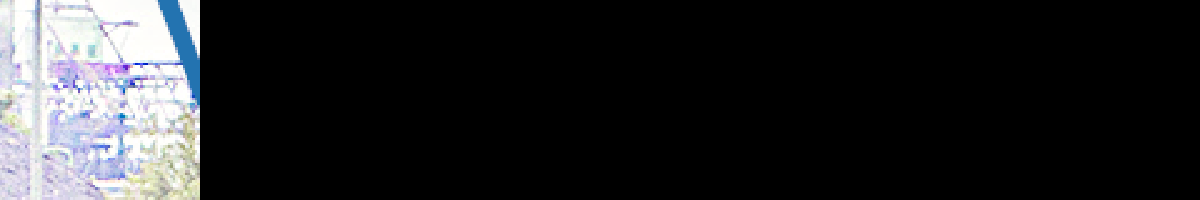

None

'Results found in file a-13.png'

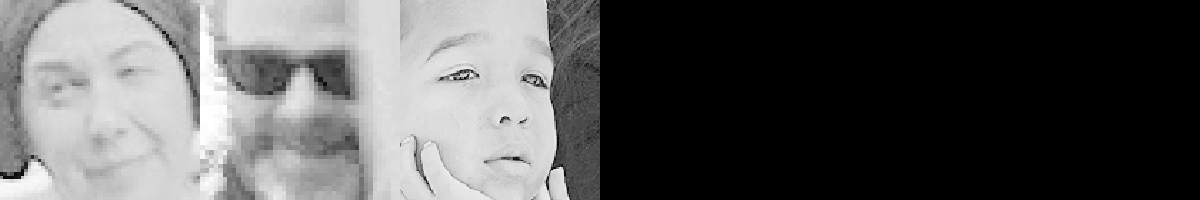

None

'Results found in file a-2.png'

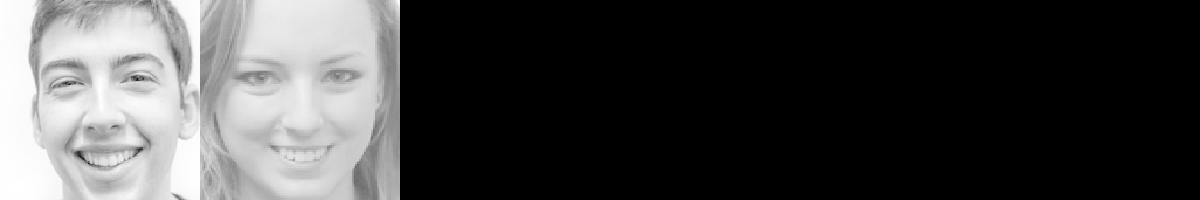

None

'Results found in file a-3.png'

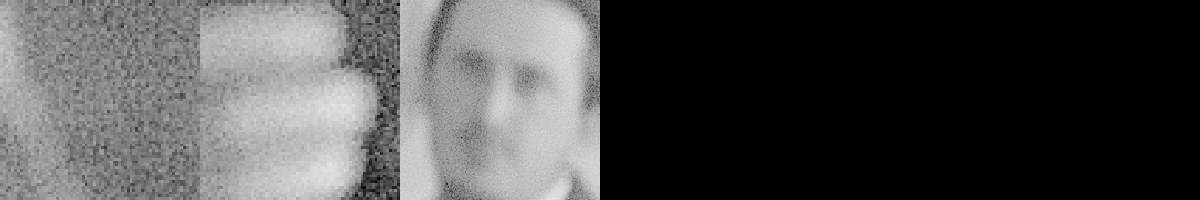

None

'Results found in file a-5.png'

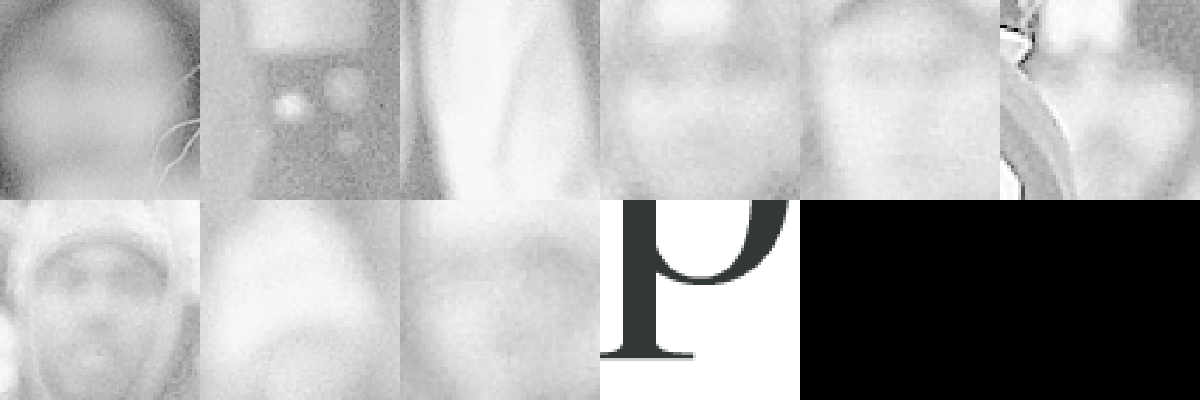

None

'Results found in file a-8.png'

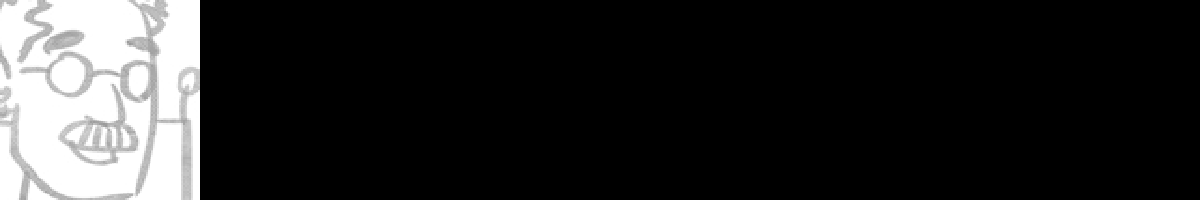

None

'Results found in file a-9.png'

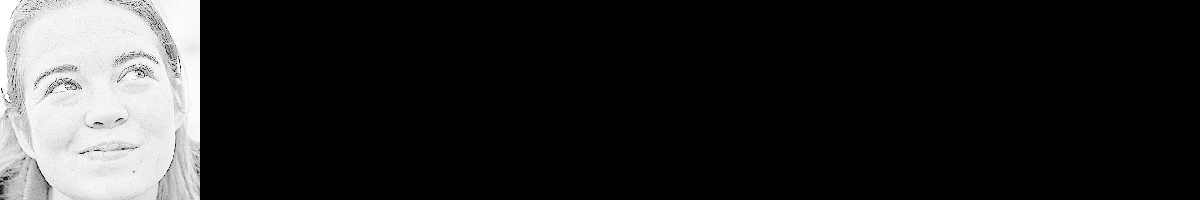

None

In [88]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import cv2
import numpy as np

import io
import re

# loading the face detection classifier
# https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')


mymap = {}

with zipfile.ZipFile('/Users/rico/Downloads/images__1.zip') as myzip:
    for filename in myzip.namelist():
        with myzip.open(filename) as myfile_glob:
            # filename - file in zip file
            f = io.BytesIO(myfile_glob.read())
            im = Image.open(f)
            
            # extract text from grayscale image
            config = ('-l eng --oem 1 --psm 3')
            text = pytesseract.image_to_string(im.convert('L'), config=config)
            text = text.lower()
            text = re.sub('\s+', ' ', text)
            text = re.sub('[^a-z\s0-9]', '', text)
            text = re.sub('-', '', text)

            # here i try create cv2 image from bytes
            img_np = np.array(im)
            #nparr = np.frombuffer(f, np.uint8)
            #img_np = cv2.imdecode(nparr, cv.IMREAD_COLOR)
            
            # extract faces
            gray = cv.cvtColor(img_np, cv.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.31)
            face_rectangles = []
            
            # crop faces
            for face in faces:
                face_rect = im.crop((face[0],face[1],face[0]+face[2],face[1]+face[3]))
                face_img = face_rect.resize((200,200))
                #display(face_img)
                face_rectangles.append(face_img)
            
            # save result
            mymap[filename] = { "faces": face_rectangles, "text": text }
            
        #break

def show_faces(faces: list) -> None:
    """ Catches list of images 200x200 and show them on contact_sheet """
    # by 6 on each row
    cols = 6
    rows = len(faces) // cols
    if len(faces) % cols:
        # extra row to faces tail ;)
        rows += 1
    
    # create palete (reuse code from week 1)
    contact_sheet = Image.new(faces[0].mode, (200 * cols, 200 * rows))
    x, y = (0, 0)
    for row in range(rows):
        x = 0
        for col in range(cols):
            contact_sheet.paste(faces.pop(), (x, y))
            x += 200
            if not faces:
                break
        y += 200
        
    display(contact_sheet)

def search_by_token(token: str, dbmap: dict) -> None:
    """ Searches given token in newspaper list and tries to show all faces from it """
    for file_name, dbm in dbmap.items():
        if token.lower() in dbm["text"]:
            display(f'Results found in file {file_name}')
            if dbm["faces"]:
                display(show_faces(dbm["faces"]))
            else:
                display('But there were no faces in that file!')

search_by_token("Mark", mymap)